# Example usage for "movekit"

### Navigating to correct directory/folder:
Make sure to navigate to the _relative_ path: __movekit-master/src/__ in order to execute the examples code as below

In [1]:
import os

In [2]:
os.chdir("../src/")

In [3]:
import movekit as mkit
import movekit

In [5]:
print(mkit)

<module 'movekit' (namespace)>


In [4]:
from movekit.io_combined import read_data
from movekit.preprocessing_combined import preprocessing_methods
from movekit.feature_extraction_combined import feature_extraction_methods
from movekit.plot import plotting_methods

### Read in CSV file:
While reading in a file, just call _read_data()_ method which will automatically determine the file extension and call the appropriate method.

Note:
Currently, only two file extensions are supported, viz., 'csv' and 'xlsx'

In [5]:
# Enter absolute/complete path to CSV file-
file_loc = "../examples/datasets/fish-5.csv"

In [6]:
# Read in CSV file using appropriate method-
data = read_data(path_to_file=file_loc)

['', '', '/examples/datasets/fish-5', 'csv']




In [7]:
# Print first 5 rows of data-
print(data.head(5))

   time  animal_id       x       y
0     1        312  405.29  417.76
1     1        511  369.99  428.78
2     1        607  390.33  405.89
3     1        811  445.15  411.94
4     1        905  366.06  451.76


### Grouping data according to 'animal_id' attribute-
- 'grouping_data' function groups all values for each 'animal_id'.
- The input parameter is 'processed_data' which is the processed Pandas DataFrame
- The function returns a dictionary where-:
- key is animal_id, value in Pandas DataFrame for that 'animal_id'

In [8]:
# To group data according to 'animal_id' attribute-
data_animal_id_groups = feature_extraction_methods(
    grouping_data_fn=True, processed_data= data)

### Calculate absolute features: metric distance, direction, avg_speed, avg_acceleration 
- Calculate the metric distance and direction between two consecutive time frames/time stamps for each moving entity (animals)
- 'compute_average_speed()' function to compute average speed of an animal based on fps (frames per second) parameter
- Formula used-
- Average Speed = Total Distance Travelled / Total Time taken
- 'compute_average_speed()' function computes the average speed of an animal based on fps (frames per second) parameter

In [9]:
# Compute distance and direction data using fps = 5-
distance_direction_data = feature_extraction_methods(
    compute_distance_and_direction_fn=True,
    data_animal_id_groups=data_animal_id_groups, fps=5)


Computing 'distance' attribute for Animal ID = 312


Computing 'distance' attribute for Animal ID = 511


Computing 'distance' attribute for Animal ID = 607


Computing 'distance' attribute for Animal ID = 811


Computing 'distance' attribute for Animal ID = 905



In [10]:
# Print the first 5 rows to verify that 'distance' & 'direction' attributes have
# been computed for animal_id = 312-
distance_direction_data[312].head()

,time,animal_id,x,y,distance,average_speed,average_acceleration,positive_acceleration,direction,stopped
0,1,312,405.29,417.76,0.000000,0,0,0,NaN,0
1,2,312,405.31,417.37,0.390512,0,0,0,-87.064327,0
2,3,312,405.31,417.07,0.300000,0,0,0,-90.000000,0
3,4,312,405.30,416.86,0.210238,0,0,0,-92.726311,0
4,5,312,405.29,416.71,0.150333,0,0,0,-93.814075,0


In [11]:
# Compute average speed using SAME fps as above-
avg_speed_data = feature_extraction_methods(
    compute_average_speed_fn=True,
    data_animal_id_groups=data_animal_id_groups, fps = 5)


Computing 'average_speed' attribute for animal id = 312


Computing 'average_speed' attribute for animal id = 511


Computing 'average_speed' attribute for animal id = 607


Computing 'average_speed' attribute for animal id = 811


Computing 'average_speed' attribute for animal id = 905



In [12]:
# Compute average acceleration using SAME fps as above-
avg_acc_data = feature_extraction_methods(
    compute_average_acceleration_fn=True,
    data_animal_id_groups=data_animal_id_groups, fps = 5)


Computing 'average_acceleration' attribute for animal ID = 312


Computing 'average_acceleration' attribute for animal ID = 511


Computing 'average_acceleration' attribute for animal ID = 607


Computing 'average_acceleration' attribute for animal ID = 811


Computing 'average_acceleration' attribute for animal ID = 905



### Compute derived features 
* For instance, compute the _stopped_ and _moving_ information for each animal

In [13]:
# Computing stops-
stop_data = feature_extraction_methods(
    computing_stops_fn=True,
    data_animal_id_groups=data_animal_id_groups,
    threshold_speed=1)


Animal ID = 312: Number of movers stopped according to threshold speed = 1 is 552
Animal ID = 312: Number of movers moving according to threshold speed = 1 is 448


Animal ID = 511: Number of movers stopped according to threshold speed = 1 is 580
Animal ID = 511: Number of movers moving according to threshold speed = 1 is 420


Animal ID = 607: Number of movers stopped according to threshold speed = 1 is 479
Animal ID = 607: Number of movers moving according to threshold speed = 1 is 521


Animal ID = 811: Number of movers stopped according to threshold speed = 1 is 462
Animal ID = 811: Number of movers moving according to threshold speed = 1 is 538


Animal ID = 905: Number of movers stopped according to threshold speed = 1 is 569
Animal ID = 905: Number of movers moving according to threshold speed = 1 is 431



In [ ]:
# Computing medoid computation-
medoid_data = feature_extraction_methods(
    medoid_computation_fn=True, data=data)

### Compute euclidean distance matrix 

In [14]:
# distance_euclidean_matrix_output = distance_euclidean_matrix(data)
distance_euclidean_matrix_output = feature_extraction_methods(
    distance_euclidean_matrix_fn=True, data = data)

In [15]:
distance_euclidean_matrix_output.head()

,animal_id,312,511,607,811,905
0,312,0.000000,36.980135,19.097081,40.282651,51.913321
1,511,36.980135,0.000000,30.621360,77.023446,23.313629
2,607,19.097081,30.621360,0.000000,55.152832,51.894988
3,811,40.282651,77.023446,55.152832,0.000000,88.548634
4,905,51.913321,23.313629,51.894988,88.548634,0.000000


### Save to CSV : Optional

In [ ]:
# save features to csv-
distance_euclidean_matrix_output.to_csv("fish-5-features.csv")

### Using "tsfresh" Python library:

In [22]:
# For extracting all time series related features, do-
extracted_features = feature_extraction_methods(time_series_analyis_fn=True, data = data)

Feature Extraction: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


In [23]:
# Save to disk 
print(extracted_features)
#extracted_features.to_json("extraced_features_fish.json")

variable  x__abs_energy  x__absolute_sum_of_changes  \
id                                                    
312        1.425114e+08                      967.33   
511        1.262405e+08                      928.39   
607        1.274228e+08                     1014.26   
811        1.614271e+08                     1115.15   
905        1.334611e+08                      954.27   

variable  x__agg_autocorrelation__f_agg_"mean"__maxlag_40  \
id                                                          
312                                              0.957126   
511                                              0.954652   
607                                              0.959992   
811                                              0.963424   
905                                              0.968320   

variable  x__agg_autocorrelation__f_agg_"median"__maxlag_40  \
id                                                            
312                                                0.959848 

# Plot features:

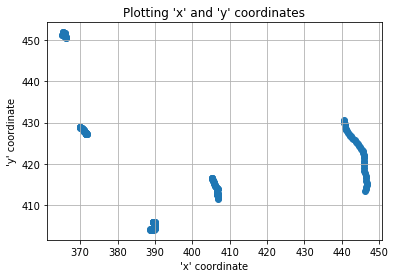

In [14]:
# Plot 'x' and 'y' attributes from 5 to 50 time steps-
plotting_methods(plot_x_y_attributes_fn=True, data = data, frm=5, to = 50)

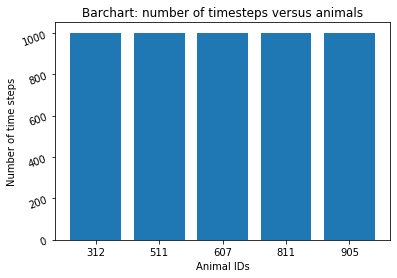

In [17]:
# Plot number of time steps for each 'animal_id'-
plotting_methods(plot_animal_timesteps_fn = True, data_animal_id_groups=data_animal_id_groups)

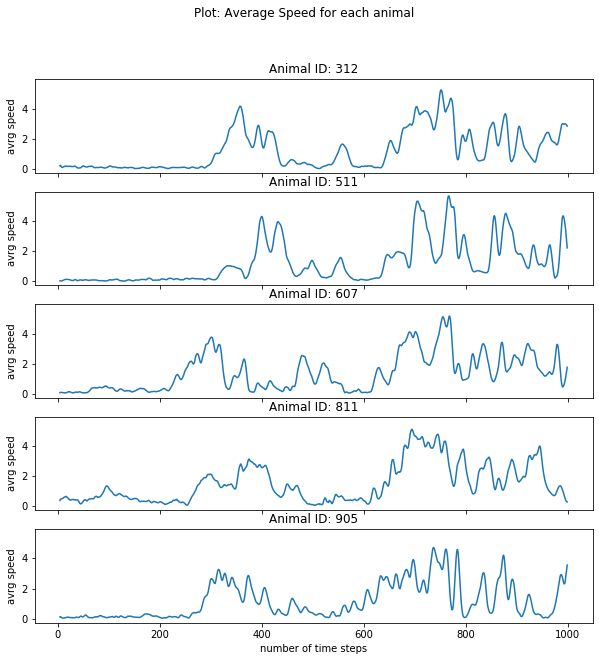

In [18]:
# Plot average speed for each animal-
plotting_methods(plot_avg_speed_fn=True, avg_speed_data=avg_speed_data)

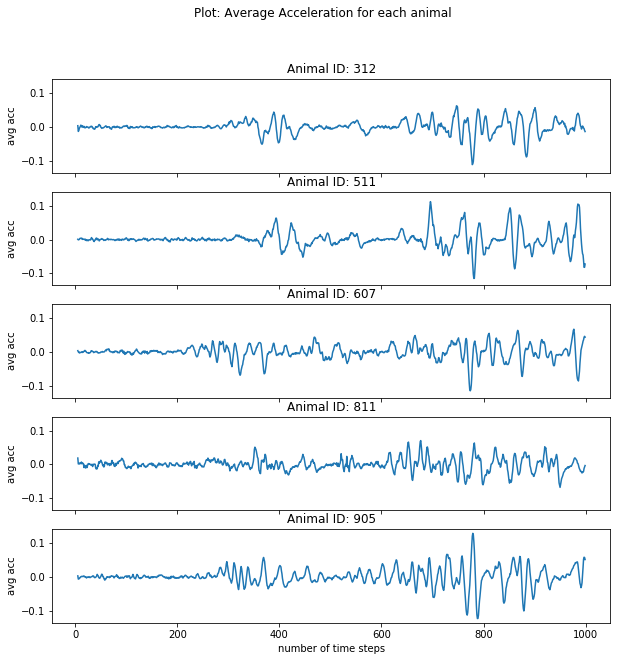

In [19]:
# Plot average acceleration for each animal-
plotting_methods(plot_avg_acceleration_fn=True, avg_acc_data=avg_acc_data)

In [21]:
data_animal_id_groups.keys()

dict_keys([312, 511, 607, 811, 905])

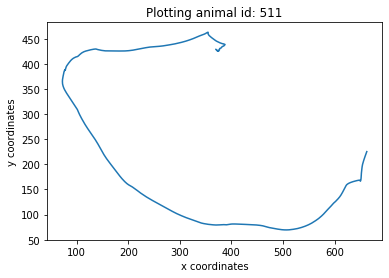

In [22]:
# Plot 'x' & 'y' attributes for animal_id = 511-
plotting_methods(plot_animal_fn=True, data_animal_id_groups= data_animal_id_groups,
                 animal_id=511)